# Fake News Detection Using Machine Learning  

## Project Description  

This project aims to develop a system for detecting fake news articles using machine learning techniques. With the increasing spread of misinformation, especially on digital platforms, the ability to distinguish between real and fake news is crucial to maintaining public trust and preventing the spread of harmful information.  

### Objectives:  
- To preprocess and analyze textual data from a dataset containing 44,919 news articles labeled as real or fake.  
- To implement a machine learning model (Logistic Regression) for binary classification of news articles.  
- To experiment with advanced models like transformer-based architectures (e.g., DistilBERT) for improved performance, while addressing computational constraints.  
- To focus on achieving high recall to maximize the detection of fake news, while also minimizing false positives for better reliability.  

### Methodology:  
1. **Dataset**:  
   - Contains features such as `title`, `text`, `subject`, and `class` (0 = Real, 1 = Fake).  
   - Challenges include class imbalance and variability in writing styles.  

2. **Preprocessing**:  
   - Text cleaning through tokenization and removal of stopwords.  
   - Feature extraction using vectorization techniques like TF-IDF or Count Vectorizer.  

3. **Model Implementation**:
   -Decision Tree was implemented as a test for other models.
   - Logistic Regression was employed for its simplicity, efficiency, and interpretability.  
   - Transformers like DistilBERT were explored for their superior context understanding but faced memory limitations during training.  

4. **Evaluation**:  
   - The system was evaluated on its accuracy, recall, and precision to ensure effective classification of fake news while reducing false positives.  

This project highlights the potential of machine learning in addressing misinformation and discusses the trade-offs between traditional and advanced approaches for text classification tasks.  


In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/ml-datasets/News.csv',index_col=0)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [5]:
data.shape

(44919, 5)

In [6]:
data = data.drop(["title", "subject","date"], axis = 1)

In [7]:
data.isnull().sum()

,0
text,0
class,0


In [8]:
# Shuffling
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

<Axes: xlabel='class', ylabel='count'>

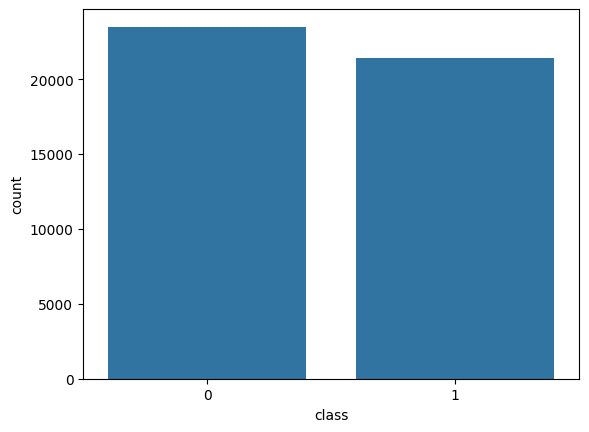

In [9]:
sns.countplot(data=data,
              x='class',
              order=data['class'].value_counts().index)

In [10]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

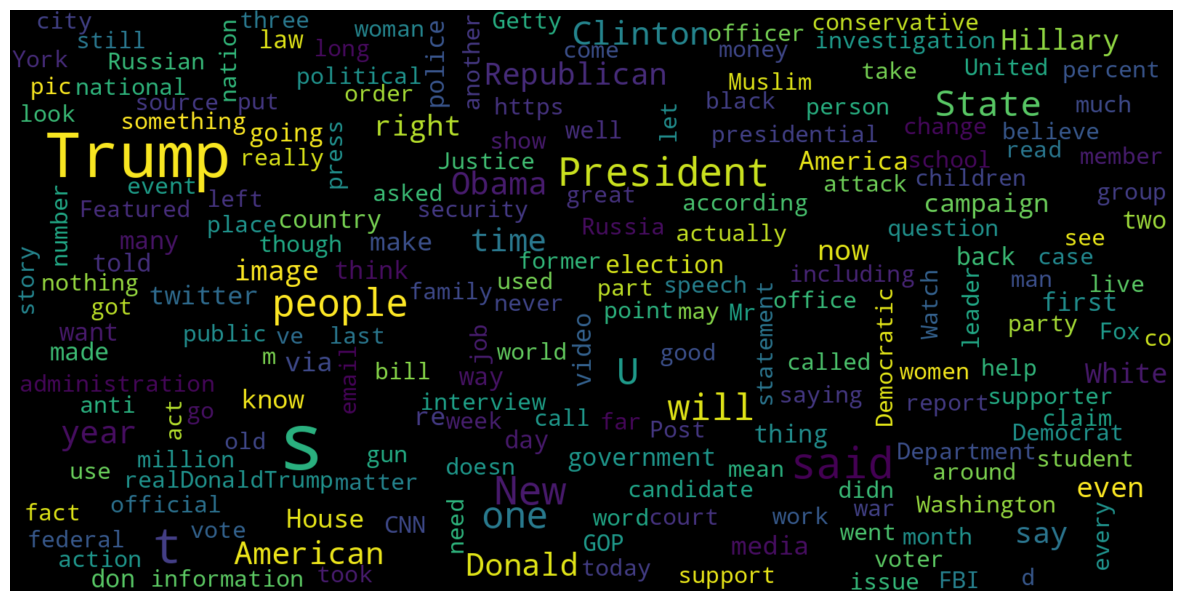

In [12]:
# Fake
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

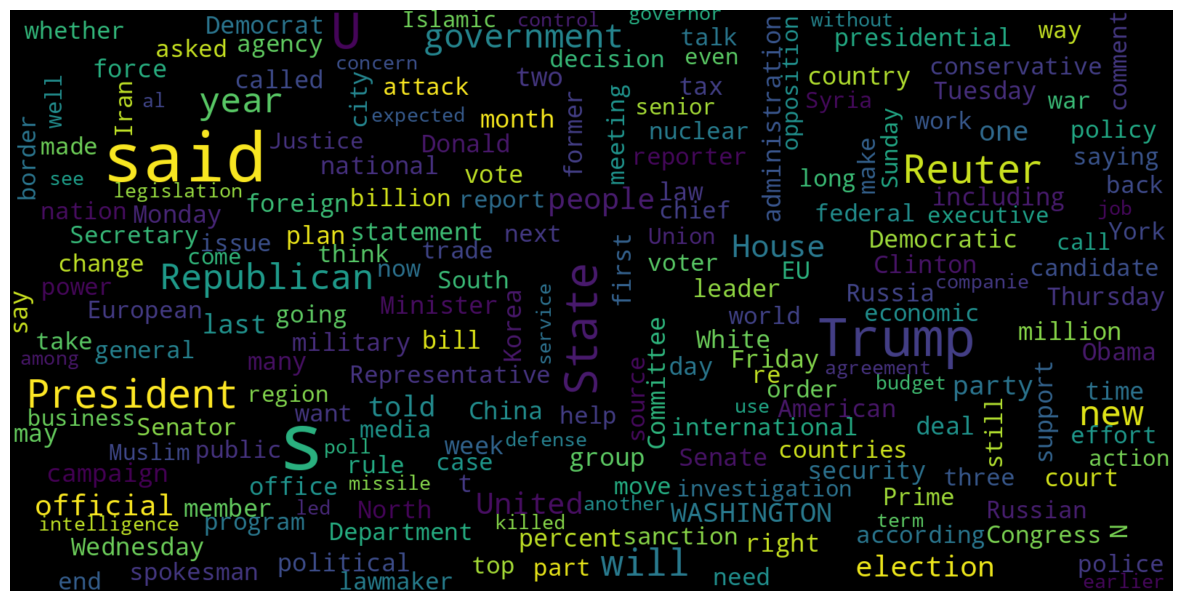

In [13]:
# Real
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

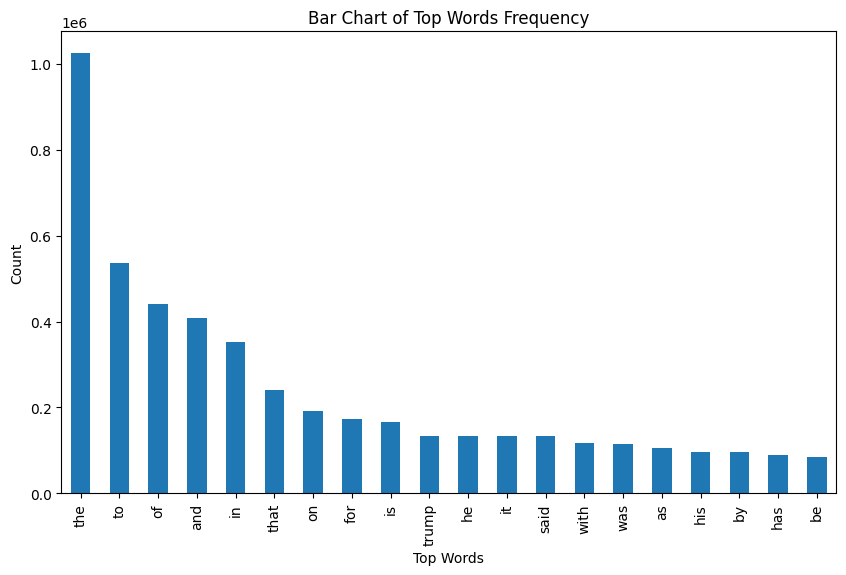

In [14]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'],
                                                    data['class'],
                                                    test_size=0.25)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9912731158538395
0.9869991095280498


In [18]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

1.0
0.9964381121994658


In [19]:
from sklearn.metrics import classification_report

# Predictions for classification report
y_pred = model.predict(x_test)  # Replace `model` with the relevant model (e.g., LogisticRegression or DecisionTreeClassifier)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5890
           1       1.00      1.00      1.00      5340

    accuracy                           1.00     11230
   macro avg       1.00      1.00      1.00     11230
weighted avg       1.00      1.00      1.00     11230



In [20]:
# Debugging data splits
print(f"Train size: {len(y_train)}, Test size: {len(y_test)}")

# Debugging predictions and true labels
print("Sample True Labels:", y_test[:5])
print("Sample Predictions:", y_pred[:5])

# Debugging class distribution
from collections import Counter
print("Class Distribution in Test Set:", Counter(y_test))

Train size: 33689, Test size: 11230
Sample True Labels: 653      1
2272     0
6098     0
6069     1
21054    1
Name: class, dtype: int64
Sample Predictions: [1 0 0 1 1]
Class Distribution in Test Set: Counter({0: 5890, 1: 5340})


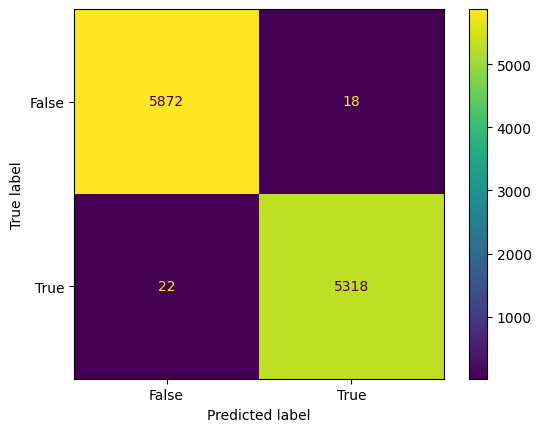

In [21]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

## Experimenting with Transformer Models  

As part of this project, we explored the use of advanced transformer-based models, specifically **DistilBERT**, to enhance the performance of fake news detection. Transformers are known for their ability to understand contextual relationships between words and sentences, making them highly effective for text classification tasks.  

### Why DistilBERT?  
- **Contextual Understanding**: DistilBERT leverages attention mechanisms to capture deep semantic meanings, which are crucial for distinguishing between subtle differences in real and fake news articles.  
- **Efficiency**: Compared to the original BERT model, DistilBERT is lighter and faster while retaining 97% of its performance, making it a suitable choice for resource-constrained environments.  

### Implementation Workflow  
1. **Text Tokenization**: The text data was tokenized into subwords using a pre-trained DistilBERT tokenizer. Special tokens like `[CLS]` and `[SEP]` were added to indicate the start and end of sequences.  
2. **Model Architecture**: The DistilBERT base model was fine-tuned by adding a classification head for binary output (fake or real news).  
3. **Sequence Length**: Due to the nature of news articles, the text sequences often exceeded the model's token limit (512 tokens). Truncation was applied to manage input size.  

### Challenges Faced  
- **Memory Limitations**:  
   - Training DistilBERT requires substantial computational resources, particularly GPUs or TPUs with high memory capacity.  
   - During fine-tuning, the model’s memory usage exceeded the available GPU memory, especially for longer articles and larger batch sizes.  
   - Attempts to reduce memory usage by lowering batch size and truncating text sequences led to slower training and potential loss of contextual information, impacting performance.  

- **Infeasibility of Local Training**:  
   - Due to hardware constraints, we were unable to fine-tune the model effectively.  
   - Cloud-based solutions or access to higher-specification hardware would be required to overcome this limitation.  

### Conclusion  
While DistilBERT has the potential to significantly improve the accuracy and robustness of fake news detection, the computational challenges prevented us from fully implementing it in this project. Despite these limitations, our exploration highlights the transformative potential of transformers and the importance of resource optimization for their deployment.  


In [3]:
# Import necessary libraries
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
# Load the dataset
# Replace 'path_to_your_data.csv' with the actual path to your dataset
data = pd.read_csv('/content/drive/MyDrive/ml-datasets/News.csv')

# Use the 'text' column as input and 'class' column as labels
texts = data['text'].tolist()
labels = data['class'].tolist()

# Split the dataset into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

# Load the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize the data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)

# Convert the tokenized data into PyTorch Dataset format
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = NewsDataset(train_encodings, train_labels)
val_dataset = NewsDataset(val_encodings, val_labels)

# Load the pre-trained DistilBERT model for sequence classification
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    evaluation_strategy="epoch",    # evaluate each epoch
    save_strategy="epoch",          # save each epoch (to match evaluation_strategy)
    learning_rate=5e-5,             # learning rate
    per_device_train_batch_size=16, # batch size for training
    per_device_eval_batch_size=64,  # batch size for evaluation
    num_train_epochs=3,             # total number of training epochs
    weight_decay=0.01,              # strength of weight decay
    logging_dir='./logs',           # directory for storing logs
    logging_steps=10,
    save_total_limit=2,             # limit the total checkpoints
    load_best_model_at_end=True     # load the best model at the end
)

# Define the compute_metrics function with manual accuracy calculation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc}

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Save the trained model and tokenizer
model.save_pretrained("./fake_news_model")
tokenizer.save_pretrained("./fake_news_model")

# Load the model for inference
from transformers import pipeline

classifier = pipeline("text-classification", model="./fake_news_model", tokenizer="./fake_news_model")

# Predict on a new sample
sample_text = "This is a sample news article text."
prediction = classifier(sample_text)
print("Prediction:", prediction)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

KeyboardInterrupt: 